In [56]:
#importing packages

import pandas as pd
import numpy as np
import ta
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
indicators = pd.read_csv('wig20_5d_extended.csv') #reading data
indicators['Data'] = pd.to_datetime(indicators['Data']) #changing date format 
indicators.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'] #renaming columns
indicators.head()

,Date,Open,High,Low,Close,Volume
0,2019-03-01,2339.97,2349.46,2330.85,2333.11,20112068.0
1,2019-03-04,2341.55,2349.08,2321.71,2328.05,25995529.0
2,2019-03-05,2325.80,2338.74,2318.81,2321.32,15909279.0
3,2019-03-06,2325.09,2329.40,2317.00,2327.16,20220415.0
4,2019-03-07,2326.78,2335.46,2305.25,2308.48,16175290.0


In [58]:
#calculating technical indicators

indicators['RSI'] = ta.momentum.RSIIndicator(
    close = indicators['Close'], 
    window=14).rsi()

indicators['Stochastic Oscillator'] = ta.momentum.StochasticOscillator(
    high = indicators['High'], 
    low = indicators['Low'], 
    close = indicators['Close'], 
    window = 14).stoch()

indicators['SMAs'] = ta.trend.SMAIndicator(
    close = indicators['Close'], 
    window=14).sma_indicator()

indicators['SMAm'] = ta.trend.SMAIndicator(
    close = indicators['Close'], 
    window=50).sma_indicator()

indicators['MACD'] = ta.trend.MACD(close = indicators['Close']).macd_diff()

indicators['A/D'] = ta.volume.AccDistIndexIndicator(
    high = indicators['High'], 
    low = indicators['Low'], 
    close = indicators['Close'], 
    volume = indicators['Volume']).acc_dist_index()

indicators.head()

,Date,Open,High,Low,Close,Volume,RSI,Stochastic Oscillator,SMAs,SMAm,MACD,A/D
0,2019-03-01,2339.97,2349.46,2330.85,2333.11,20112068.0,NaN,NaN,NaN,NaN,NaN,-1.522725e+07
1,2019-03-04,2341.55,2349.08,2321.71,2328.05,25995529.0,NaN,NaN,NaN,NaN,NaN,-2.917954e+07
2,2019-03-05,2325.80,2338.74,2318.81,2321.32,15909279.0,NaN,NaN,NaN,NaN,NaN,-4.108157e+07
3,2019-03-06,2325.09,2329.40,2317.00,2327.16,20220415.0,NaN,NaN,NaN,NaN,NaN,-2.816659e+07
4,2019-03-07,2326.78,2335.46,2305.25,2308.48,16175290.0,NaN,NaN,NaN,NaN,NaN,-4.088301e+07


In [59]:
indicators.shape

(1378, 12)

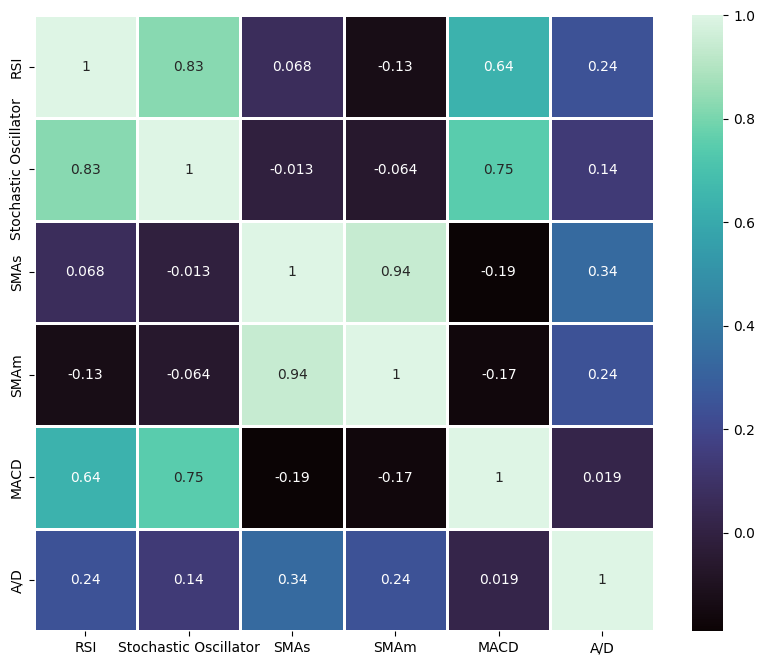

In [60]:
correlation = indicators.iloc[:, 6:].corr() #calculating correlation for indicators

#plotting the results
plt.figure(figsize = (10,8))
sns.heatmap(correlation, annot=True, cmap='mako', linewidth=1)
plt.show()

In [61]:
indicators.to_csv('technical_indicators.csv') #saving new dataset